This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [64]:
# page 198
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [65]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [66]:
# causes error, no weights yet
# model.weights

**Calling a model for the first time to build it**

In [67]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_39/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.25031728,  0.01534441, -0.19775894, -0.0533713 , -0.19900838,
         -0.21239123,  0.18492162, -0.02853554,  0.04528522, -0.11915527,
          0.23448068,  0.10056621,  0.14387202,  0.1552431 ,  0.15800008,
          0.14165056,  0.08580014,  0.2941394 , -0.24996158, -0.15067549,
          0.08262938,  0.01902801,  0.06818375,  0.15101212, -0.11754432,
          0.01194856, -0.23089363, -0.19541505,  0.29361027, -0.03111541,
          0.29183418,  0.21781808,  0.06765148, -0.13511463, -0.26062495,
         -0.02713749,  0.07598507,  0.178949  , -0.15860184,  0.01908416,
         -0.07957344,  0.14780939, -0.11271225, -0.16105576, -0.2730108 ,
         -0.23488694,  0.17728665,  0.28847498, -0.23735198, -0.09797792,
         -0.21251488,  0.08551297, -0.11699495,  0.06557307,  0.01814172,
          0.2665431 , -0.04878703,  0.05300608,  0.12332311, -0.05819638,
          0.0654926 ,  0.17736107,  0.0402

**The summary method**

In [68]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                256       
                                                                 
 dense_40 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Naming models and layers with the `name` argument**

In [69]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Specifying the input shape of your model in advance**

In [70]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                256       
                                                                 
 dense_42 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [73]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [74]:
inputs = keras.Input(shape=(3,), name="my_input")

In [75]:
inputs.shape

TensorShape([None, 3])

In [76]:
inputs.dtype

tf.float32

In [77]:
features = layers.Dense(64, activation="relu")(inputs)

In [78]:
features.shape

TensorShape([None, 64])

In [79]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [80]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_45 (Dense)            (None, 64)                256       
                                                                 
 dense_46 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [81]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [82]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 7ms/step - loss: 27.1018 - priority_loss: 0.3195 - department_loss: 26.7823 - priority_mean_absolute_error: 0.4870 - department_accuracy: 0.1906


40/40 [==============================] - 0s 4ms/step


**Training a model by providing dicts of input & target arrays**

In [83]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=5)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

Epoch 1/5
40/40 [==============================] - 1s 9ms/step - loss: 33.9342 - priority_loss: 0.3271 - department_loss: 33.6071 - priority_mean_absolute_error: 0.4950 - department_accuracy: 0.2211
Epoch 2/5
40/40 [==============================] - 0s 9ms/step - loss: 33.2312 - priority_loss: 0.3271 - department_loss: 32.9041 - priority_mean_absolute_error: 0.4950 - department_accuracy: 0.2547
Epoch 3/5
40/40 [==============================] - 0s 8ms/step - loss: 39.3758 - priority_loss: 0.3271 - department_loss: 39.0488 - priority_mean_absolute_error: 0.4950 - department_accuracy: 0.2688
Epoch 4/5
40/40 [==============================] - 0s 8ms/step - loss: 48.4454 - priority_loss: 0.3271 - department_loss: 48.1184 - priority_mean_absolute_error: 0.4950 - department_accuracy: 0.2391
Epoch 5/5
40/40 [==============================] - 0s 3ms/step


#### The power of the Functional API: Access to layer connectivity

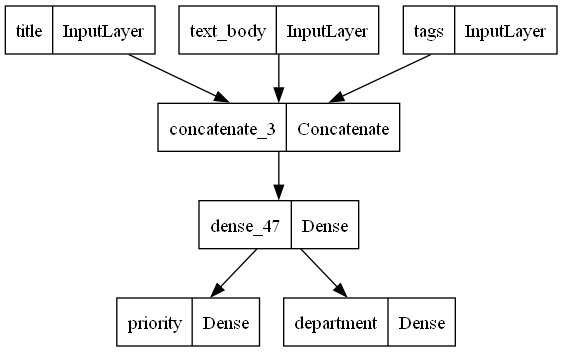

In [84]:
# install pydot / graphviz TODO
import pydot
import graphviz
# import sys
# # Define the directory you want to add to sys.path
# my_directory = "c:\\users\\mccar\\appdata\\local\\programs\\python\\python311\\lib\\site-packages"

# # Add the directory to sys.path
# sys.path.append(my_directory)
keras.utils.plot_model(model, "..\\pngs\\7ch\\ticket_classifier.png")

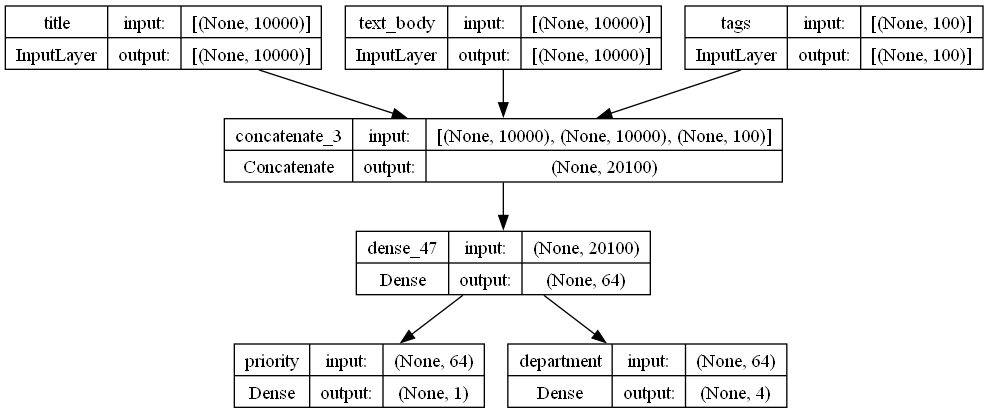

In [85]:
keras.utils.plot_model(model, "..\\pngs\\7ch\\ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [86]:
model.layers

In [87]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [88]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_3')>

**Creating a new model by reusing intermediate layer outputs**

In [89]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

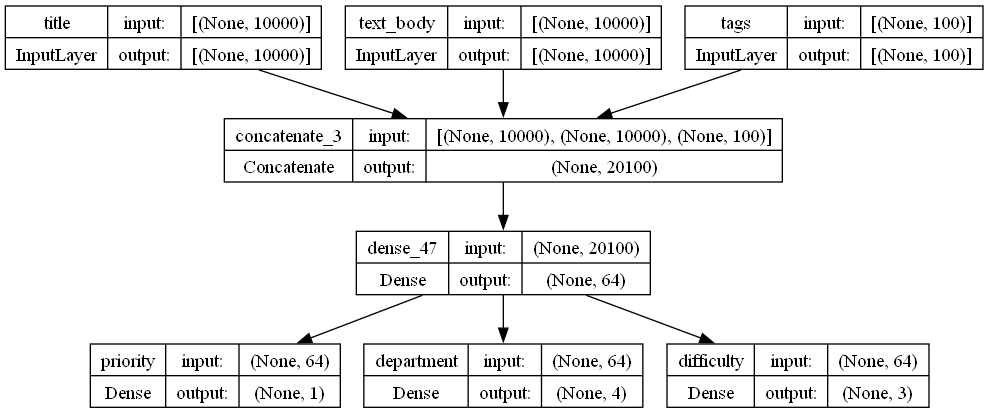

In [90]:
keras.utils.plot_model(new_model, "..\\pngs\\7ch\\updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [91]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [92]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [93]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [94]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [95]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [96]:
# page 210
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
print(test_metrics)
print(predictions[:10])

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2938 - accuracy: 0.9123 - val_loss: 0.1642 - val_accuracy: 0.9511
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1599 - accuracy: 0.9539 - val_loss: 0.1150 - val_accuracy: 0.9682
Epoch 3/3
313/313 [==============================] - 0s 1ms/step
[0.09596212953329086, 0.9721999764442444]
[[2.41473908e-09 1.49483037e-10 5.24959546e-07 1.11409736e-06
  2.89883596e-13 1.99932848e-09 1.24469891e-14 9.99998212e-01
  7.36990524e-10 2.14839957e-07]
 [1.04014930e-08 1.60987597e-07 9.99989152e-01 9.88000920e-06
  7.33541186e-17 4.15991252e-07 5.39570832e-09 1.83234866e-16
  3.55338045e-07 2.51585015e-17]
 [1.63299785e-06 9.99552071e-01 3.33969256e-05 2.05991523e-06
  5.93914556e-05 3.60776103e-05 4.54761175e-05 2.27255747e-04
  4.05999526e-05 1.99168721e-06]
 [9.99939203e-01 1.12850032e-08 5.88512285e-06 4.12982821e-08
  4.29893063e-08 2.23028383e-06 3.82834114e-05 1.13257765e-05
  3.15391002

### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [97]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [98]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2945 - accuracy: 0.9120 - rmse: 7.1777 - val_loss: 0.1599 - val_accuracy: 0.9522 - val_rmse: 7.3481
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1611 - accuracy: 0.9539 - rmse: 7.3514 - val_loss: 0.1244 - val_accuracy: 0.9650 - val_rmse: 7.3981
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9736 - rmse: 7.4330


### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [106]:
# Have to write our own becuase their is a bug in ModelCheckpoint
def save_model_checkpoint(epoch, logs):
    if logs['val_loss'] < save_model_checkpoint.best_val_loss:
        save_model_checkpoint.best_val_loss = logs['val_loss']
        model.save_weights("../output/model_checkpoint")
        model.save("../output/model_checkpoint")
        print(' Model checkpoint saved.')
save_model_checkpoint.best_val_loss = float('inf')


# callbacks_list = [
#     keras.callbacks.EarlyStopping(
#         monitor="val_accuracy",
#         patience=2,
#     ),
#     keras.callbacks.ModelCheckpoint(
#         filepath="../output/checkpoint_path.keras",
#         monitor="val_loss",
#         save_best_only=True,
#     )
# ]

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.LambdaCallback(on_epoch_end=save_model_checkpoint)
]


model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2967 - accuracy: 0.9111INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


 Model checkpoint saved.
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.9111 - val_loss: 0.1421 - val_accuracy: 0.9601
Epoch 2/10
1544/1563 [============================>.] - ETA: 0s - loss: 0.1600 - accuracy: 0.9539INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


 Model checkpoint saved.
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1600 - accuracy: 0.9539 - val_loss: 0.1203 - val_accuracy: 0.9667
Epoch 3/10
1553/1563 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9622INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


 Model checkpoint saved.
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1329 - accuracy: 0.9622 - val_loss: 0.1173 - val_accuracy: 0.9700
Epoch 4/10
1548/1563 [============================>.] - ETA: 0s - loss: 0.1132 - accuracy: 0.9683INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


 Model checkpoint saved.
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1132 - accuracy: 0.9683 - val_loss: 0.0977 - val_accuracy: 0.9753
Epoch 5/10
1556/1563 [============================>.] - ETA: 0s - loss: 0.1017 - accuracy: 0.9720INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


 Model checkpoint saved.
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1016 - accuracy: 0.9720 - val_loss: 0.0973 - val_accuracy: 0.9771
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0956 - accuracy: 0.9738 - val_loss: 0.0987 - val_accuracy: 0.9768
Epoch 7/10
1553/1563 [============================>.] - ETA: 0s - loss: 0.0876 - accuracy: 0.9761INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


 Model checkpoint saved.
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0875 - accuracy: 0.9761 - val_loss: 0.0945 - val_accuracy: 0.9775
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9774 - val_loss: 0.0950 - val_accuracy: 0.9787
Epoch 9/10
1563/1563 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9788INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


INFO:tensorflow:Assets written to: ../output/model_checkpoint\assets


 Model checkpoint saved.
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0781 - accuracy: 0.9788 - val_loss: 0.0906 - val_accuracy: 0.9805
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0769 - accuracy: 0.9801 - val_loss: 0.0917 - val_accuracy: 0.9795


In [107]:
model = keras.models.load_model("../output/model_checkpoint")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [110]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"../pngs/7ch/plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2982 - accuracy: 0.9122 - val_loss: 0.1506 - val_accuracy: 0.9550
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1599 - accuracy: 0.9544 - val_loss: 0.1185 - val_accuracy: 0.9678
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1319 - accuracy: 0.9631 - val_loss: 0.1047 - val_accuracy: 0.9716
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1157 - accuracy: 0.9686 - val_loss: 0.1034 - val_accuracy: 0.9735
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1038 - accuracy: 0.9711 - val_loss: 0.0889 - val_accuracy: 0.9769
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0956 - accuracy: 0.9735 - val_loss: 0.0926 - val_accuracy: 0.9771
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0918 - accuracy: 0.9749 - val_loss: 0.0888 - val_accur

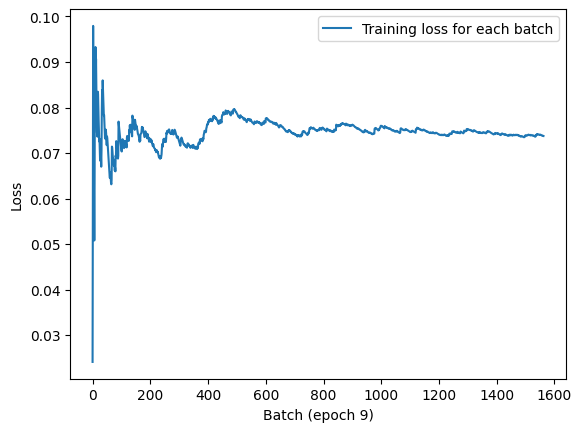

In [111]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [125]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# NEEEEEED the full path here, for unknown reasons, relative path doesn't work
tensorboard = keras.callbacks.TensorBoard(
    log_dir="C:\\Users\\mccar\\deep_learning_for_python\\7ch\\logs",
)
model.fit(train_images, train_labels,
          epochs=5,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2914 - accuracy: 0.9132 - val_loss: 0.1431 - val_accuracy: 0.9600
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1592 - accuracy: 0.9542 - val_loss: 0.1154 - val_accuracy: 0.9695
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1265 - accuracy: 0.9635 - val_loss: 0.1098 - val_accuracy: 0.9712
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1144 - accuracy: 0.9683 - val_loss: 0.0945 - val_accuracy: 0.9756
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1009 - accuracy: 0.9722 - val_loss: 0.0916 - val_accuracy: 0.9772


In [126]:
%load_ext tensorboard
%tensorboard --logdir C:\Users\mccar\deep_learning_for_python\7ch\logs
# ^^^^ can also just run this from command line but again NEEEEED full path, relative path doesn't work

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [127]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [128]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [129]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [130]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [131]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9141
...loss: 0.2859
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9536
...loss: 0.1595
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9633
...loss: 0.1306


**Writing a step-by-step evaluation loop**

In [132]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9684
...val_loss: 0.1114


### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [133]:
# This decorator makes it way faster

@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9684
...val_loss: 0.1114


### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Summary